<a href="https://colab.research.google.com/github/dzkha/DS-Unit-2-Regression-1/blob/master/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('vegan_wiki.csv')
df.shape

(1400, 2)

In [2]:
df.head()

,Date,Veganism
0,2015-07-01,3290
1,2015-07-02,3339
2,2015-07-03,3290
3,2015-07-04,2998
4,2015-07-05,3141


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

KeyError: ignored

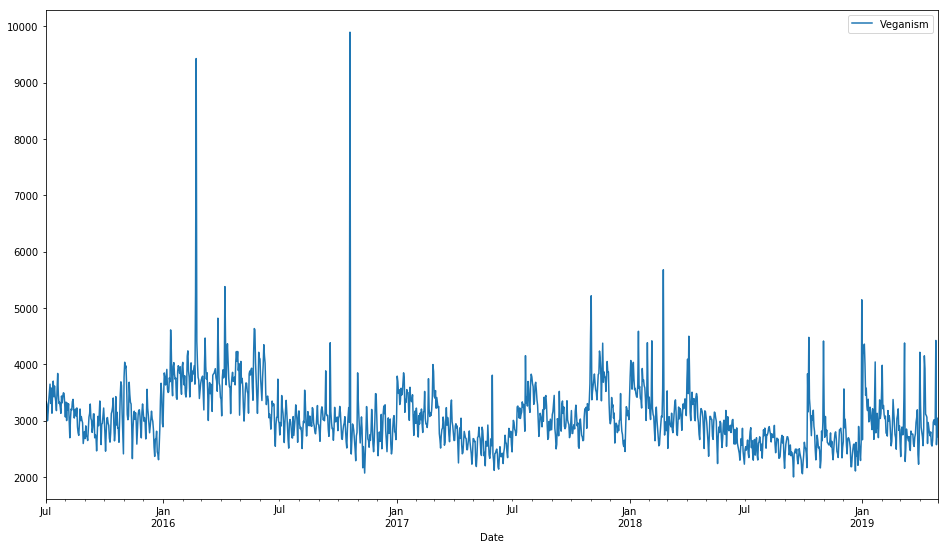

In [5]:
df.plot(figsize=(16,9))

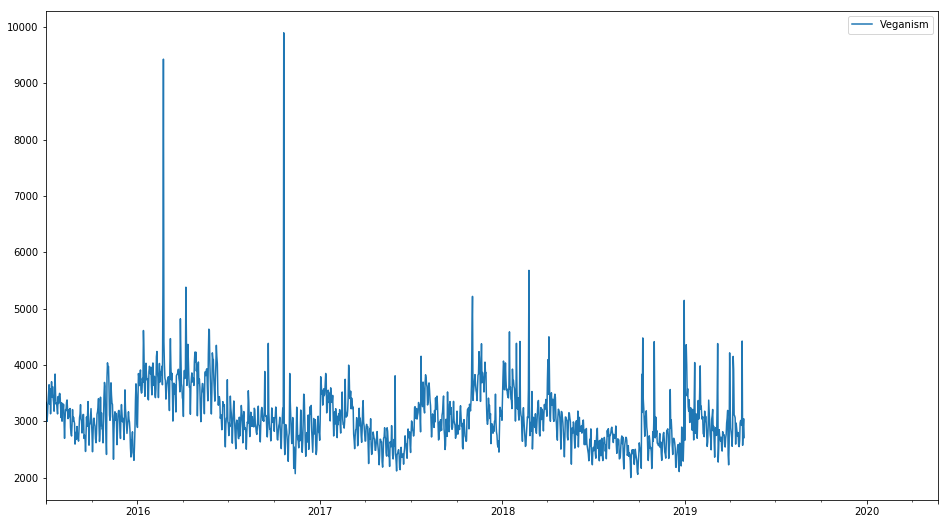

In [6]:
df = df.reindex(pd.date_range(start='2015-07-01', end='2020-05-23'))
df.plot(figsize=(16,9));

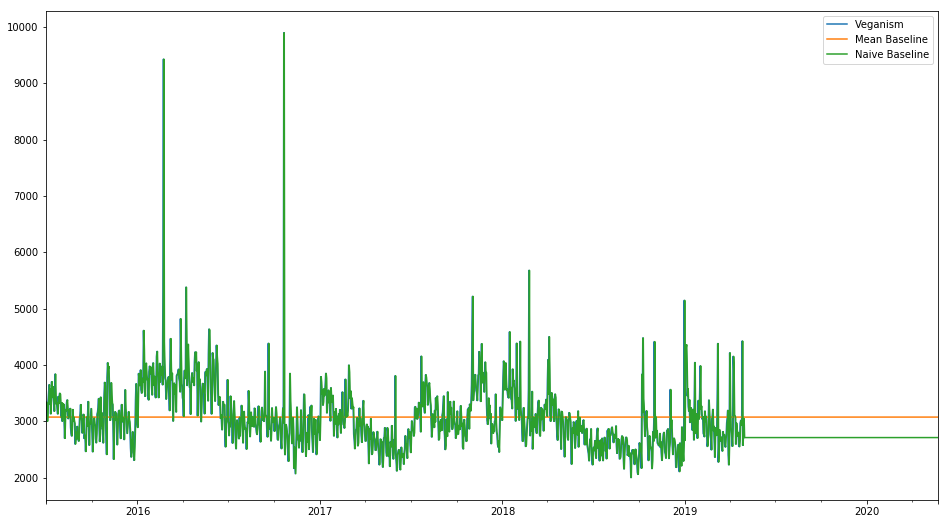

In [9]:
df['Mean Baseline'] = df['Veganism'].mean()
df['Naive Baseline'] = df['Veganism'].shift(1).ffill()
df.plot(figsize=(16,9));

In [0]:
df = df.reset_index().rename(columns={'index': 'ds', 'Veganism': 'y'})

In [11]:
from fbprophet import Prophet
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2149,2021-05-19
2150,2021-05-20
2151,2021-05-21
2152,2021-05-22
2153,2021-05-23


In [13]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2149,2021-05-19,2504.823687,134.420555,4901.617376,158.733182,4721.334720,91.218308,91.218308,91.218308,91.608360,91.608360,91.608360,-0.390053,-0.390053,-0.390053,0.0,0.0,0.0,2596.041995
2150,2021-05-20,2504.541054,120.425391,4942.460930,155.212635,4726.156775,75.849060,75.849060,75.849060,68.294689,68.294689,68.294689,7.554371,7.554371,7.554371,0.0,0.0,0.0,2580.390114
2151,2021-05-21,2504.258422,-31.229937,4758.215664,153.333653,4730.214419,-123.412855,-123.412855,-123.412855,-138.476325,-138.476325,-138.476325,15.063470,15.063470,15.063470,0.0,0.0,0.0,2380.845567
2152,2021-05-22,2503.975789,-175.753055,4562.239187,146.861213,4735.596352,-286.465057,-286.465057,-286.465057,-308.384918,-308.384918,-308.384918,21.919861,21.919861,21.919861,0.0,0.0,0.0,2217.510732
2153,2021-05-23,2503.693156,137.912571,4872.749707,139.433237,4740.978285,4.631986,4.631986,4.631986,-23.276794,-23.276794,-23.276794,27.908780,27.908780,27.908780,0.0,0.0,0.0,2508.325143


Text(0.5, 1.0, "Veganism: A common new year's resolution")

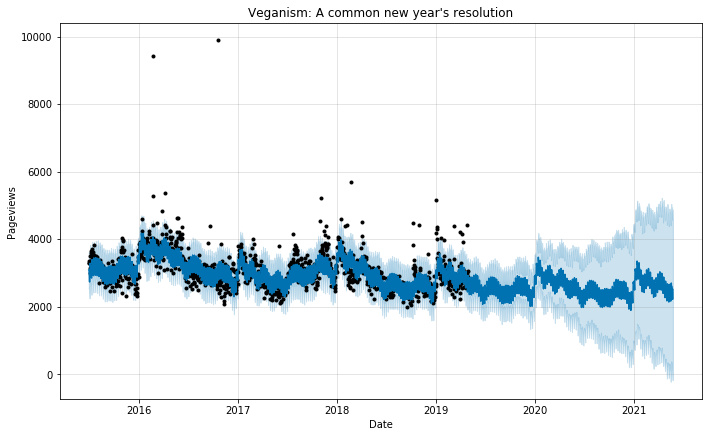

In [19]:
import matplotlib.pyplot as plt

fig1 = m.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Pageviews")
plt.title("Veganism: A common new year's resolution")